In [1]:
import albumentations as A
import cv2
import os

## Generate multiple augmentations from single image

- [x] Read a label file
- [x] Extract class_id & bbox coordinates of each annotated object
- [x] apply both pixel & spatial augmentation
- [x] save the augmented images as well as bboxes & labels to the same directory with modified names

In [2]:
IMAGES_DIR = "test_dir/images"
LABELS_DIR = "test_dir/labels"

In [3]:
files = os.listdir(IMAGES_DIR)
print(files)

['rgb_34_jpg.rf.1a09e9897f84d31eb56c3daeb3687e7a.jpg', 'rgb_27_jpg.rf.d9d978d8aeb446e9f7c5c6d7f2d2bb0a.jpg', 'rgb_29_jpg.rf.7c03c028a6b28edf0f7122750ce6446c.jpg', 'rgb_31_jpg.rf.5334df65aa93630aa70531fe1de3ad95.jpg', 'rgb_30_jpg.rf.e5261a0298cb4694c301c64c9a0747df.jpg']


## Functions

## Steps ....

#### 1. Load image and label

In [4]:
file = files[0]
file_name = os.path.splitext(file)[0]
print(file_name)

rgb_34_jpg.rf.1a09e9897f84d31eb56c3daeb3687e7a


In [5]:
label_file = os.path.join(LABELS_DIR, file_name + ".txt")
print(label_file)

test_dir/labels/rgb_34_jpg.rf.1a09e9897f84d31eb56c3daeb3687e7a.txt


In [6]:
with open(label_file, "r") as f:
    lines = f.readlines()
    print(lines)

['1 0.8343203125 0.4049583333333333 0.14381249999999995 0.21272222222222217\n', '0 0.6734921875000001 0.519625 0.14600781250000008 0.24102777777777773\n', '0 0.3463515625 0.44838888888888884 0.122953125 0.2098055555555556']


In [7]:
preprocessed_lines = [line.strip() for line in lines]
print(preprocessed_lines)

['1 0.8343203125 0.4049583333333333 0.14381249999999995 0.21272222222222217', '0 0.6734921875000001 0.519625 0.14600781250000008 0.24102777777777773', '0 0.3463515625 0.44838888888888884 0.122953125 0.2098055555555556']


In [8]:
bboxes = []
labels = []

for line in preprocessed_lines:
  line = line.split(" ")
  label = line[0]
  bbox = line[1:]
  label = int(label)
  bbox = [float(x) for x in bbox]
  bboxes.append(bbox)
  labels.append(label)

print(bboxes)
print(labels)

[[0.8343203125, 0.4049583333333333, 0.14381249999999995, 0.21272222222222217], [0.6734921875000001, 0.519625, 0.14600781250000008, 0.24102777777777773], [0.3463515625, 0.44838888888888884, 0.122953125, 0.2098055555555556]]
[1, 0, 0]


In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
import random

In [11]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    img_h, img_w, _ = img.shape
    x_center, y_center, w, h = bbox
    x_center = int(x_center * img_w)
    y_center = int(y_center * img_h)
    w = int(w * img_w)
    h = int(h * img_h)
    x_min, x_max, y_min, y_max = int(x_center-w/2), int(x_center + w/2), int(y_center-h/2), int(y_center + h/2)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [12]:
class_id_to_name = {0: "blue", 1: "purple", 2: "red"}

In [13]:
print(bboxes)

[[0.8343203125, 0.4049583333333333, 0.14381249999999995, 0.21272222222222217], [0.6734921875000001, 0.519625, 0.14600781250000008, 0.24102777777777773], [0.3463515625, 0.44838888888888884, 0.122953125, 0.2098055555555556]]


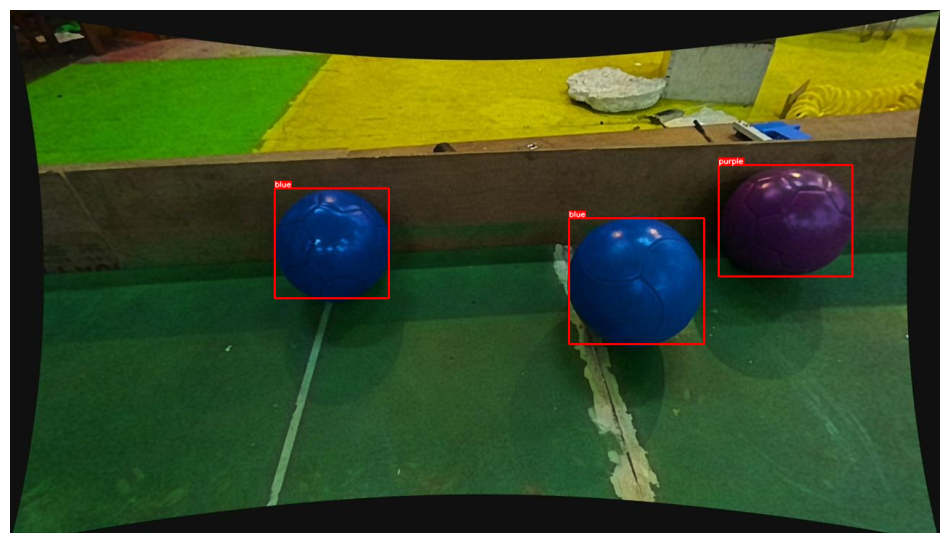

In [14]:
img = cv2.imread(os.path.join(IMAGES_DIR, file))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
visualize(img, bboxes, labels, class_id_to_name)

In [15]:
# transform = A.Compose([
#   	A.SomeOf([A.HorizontalFlip(p=1), A.RandomBrightnessContrast()], n=1,p=1),
#     A.OneOrOther(
# 				A.Blur(blur_limit=5, p=0.8),
# 				A.GaussNoise(p=0.6),
# 				p=0.8
# 		),
# ],bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']), p=1)

transform = A.Compose([
  	A.HorizontalFlip(p=1),
    A.Rotate(limit=15, p=0.8),
    A.SomeOf([A.RandomBrightnessContrast(), A.Blur(blur_limit=5)], n=1,p=1),
],bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']), p=1)

In [16]:
random.seed(11)

In [17]:
transformed = transform(image=img, bboxes=bboxes, category_ids=labels)

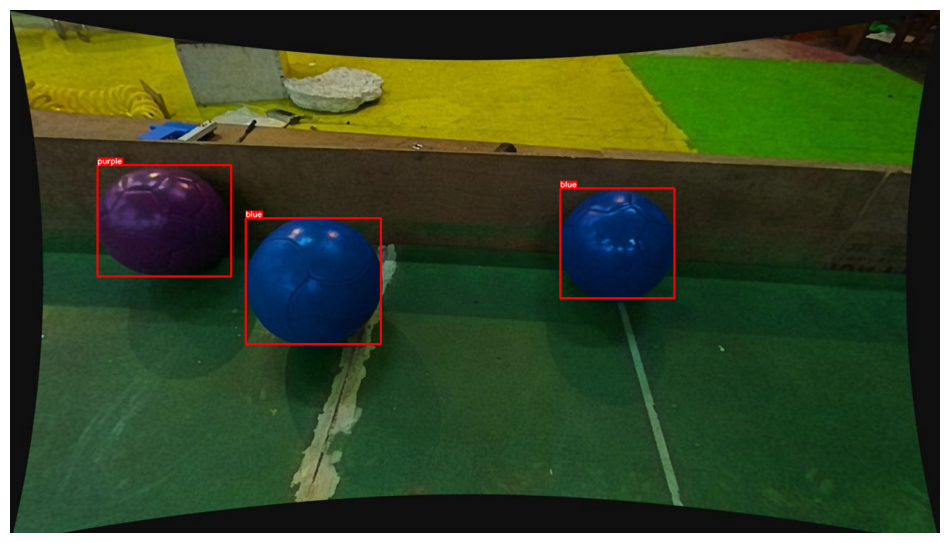

In [18]:
visualize(transformed['image'], transformed['bboxes'], transformed['category_ids'], class_id_to_name)

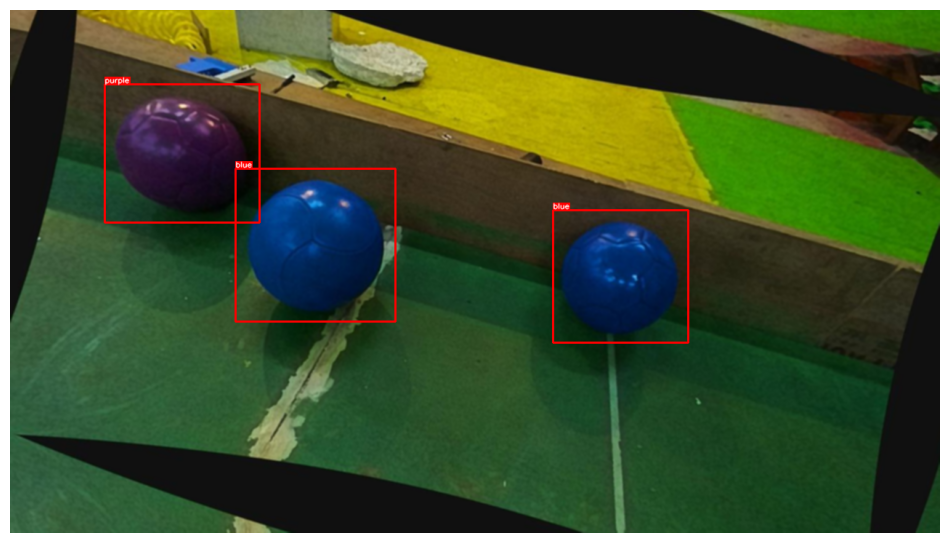

In [19]:
random.seed(7)
transformed = transform(image=img, bboxes=bboxes, category_ids=labels)
visualize(transformed['image'], transformed['bboxes'], transformed['category_ids'], class_id_to_name)

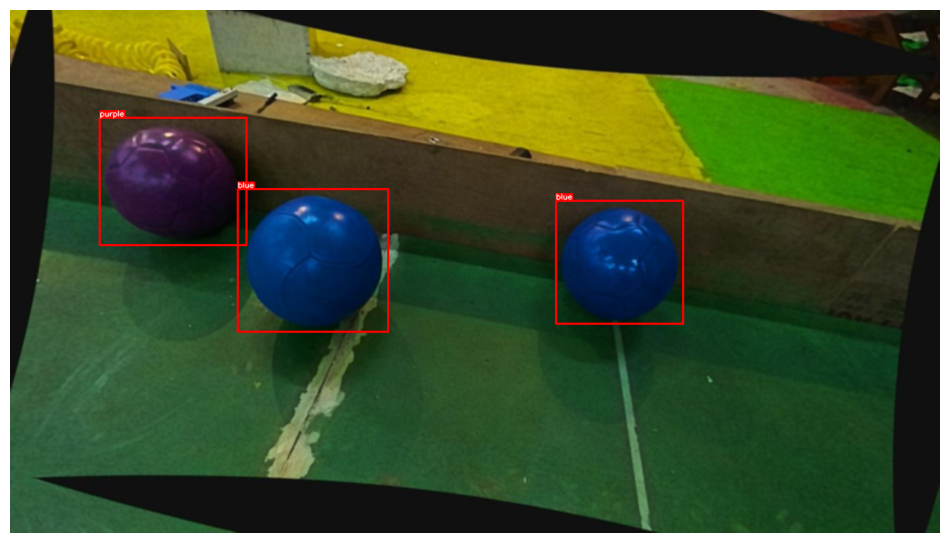

In [20]:
random.seed(1)
transformed = transform(image=img, bboxes=bboxes, category_ids=labels)
visualize(transformed['image'], transformed['bboxes'], transformed['category_ids'], class_id_to_name)

In [21]:
print(transformed['bboxes'])
print(transformed['category_ids'])

[(0.17526254125248122, 0.32972520846852305, 0.1579348365340038, 0.24367361645170488), (0.32652073126147657, 0.48001732366184446, 0.16214843785516142, 0.27224586426877445), (0.6560995778614825, 0.48374741454925263, 0.13703693623214108, 0.23603815483045637)]
[1, 0, 0]


In [24]:
def write_to_file(file_name, transformed):
	txt_file = os.path.join(LABELS_DIR, file_name + "_aug.txt")
	img_file = os.path.join(IMAGES_DIR, file_name + "_aug.jpg")

	cv2.imwrite(img_file, cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR))

	with open(txt_file, "w") as f:
		for bbox, label in zip(bboxes, labels):
			line = f"{label} {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}\n"
			f.write(line)

In [25]:
write_to_file(file_name, transformed)